In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
data.isna().sum() #apakah ada null values atau tidak

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
data[data.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [ ]:
# (column, row)
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 11)


In [ ]:
#drop duplicate data
data = data.drop_duplicates()

In [ ]:
for column in data.columns:
  num_distinct_values = len(data[column].unique())
  print(f"{column}: {num_distinct_values}")

work_year: 4
experience_level: 4
employment_type: 4
job_title: 93
salary: 815
salary_currency: 20
salary_in_usd: 1035
employee_residence: 78
remote_ratio: 3
company_location: 72
company_size: 3


In [ ]:
data.iloc[:, 3].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
data['experience_level'] = data['experience_level'].replace({
    'SE' : 'Senior',
    'EN' : 'Entry Level',
    'EX' : 'Executive Level',
    'MI' : 'Mid/Intermediate Level'
})

data['employment_type'] = data['employment_type'].replace({
    'FL' : 'Freelance',
    'CT' : 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

data['remote_ratio'] = data['remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100: 'Full-Remote'
})

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L
3752,2020,Entry Level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L


In [ ]:
print(data['job_title'].nunique())
data['job_title'].unique()

93


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return 'Data Engineering'
  elif job_title in data_scientist:
    return 'Data Scientist'
  elif job_title in machine_learning:
    return "Machine Learning"
  elif job_title in data_architecture:
    return "Data_Architecture"
  elif job_title in management:
    return "Management"
  else:
    return 'Other'

data["job_category"] = data['job_title'].apply(assign_broader_category)

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other
3752,2020,Entry Level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


In [ ]:
data[['work_year', 'salary_in_usd']]

,work_year,salary_in_usd
0,2023,85847
1,2023,30000
2,2023,25500
3,2023,175000
4,2023,120000
...,...,...
3750,2020,412000
3751,2021,151000
3752,2020,105000
3753,2020,100000


In [ ]:
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

#Function to adjust salary
def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for y in range(year, 2023):
      if currency == 'USD':
        inflation_rate = us_inflation_rates[y]
      else:
        inflation_rate = global_inflation_rates[y]

      adjusted_salary = adjusted_salary*(1+inflation_rate)

    return adjusted_salary

In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other,85847.000000
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other,168373.305000
3752,2020,Entry Level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


1.7 Job Distribution

In [ ]:
data['job_category'].value_counts(normalize=True)

Data Engineering     0.441563
Data Scientist       0.247291
Other                0.154025
Machine Learning     0.094427
Management           0.036378
Data_Architecture    0.026316
Name: job_category, dtype: float64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

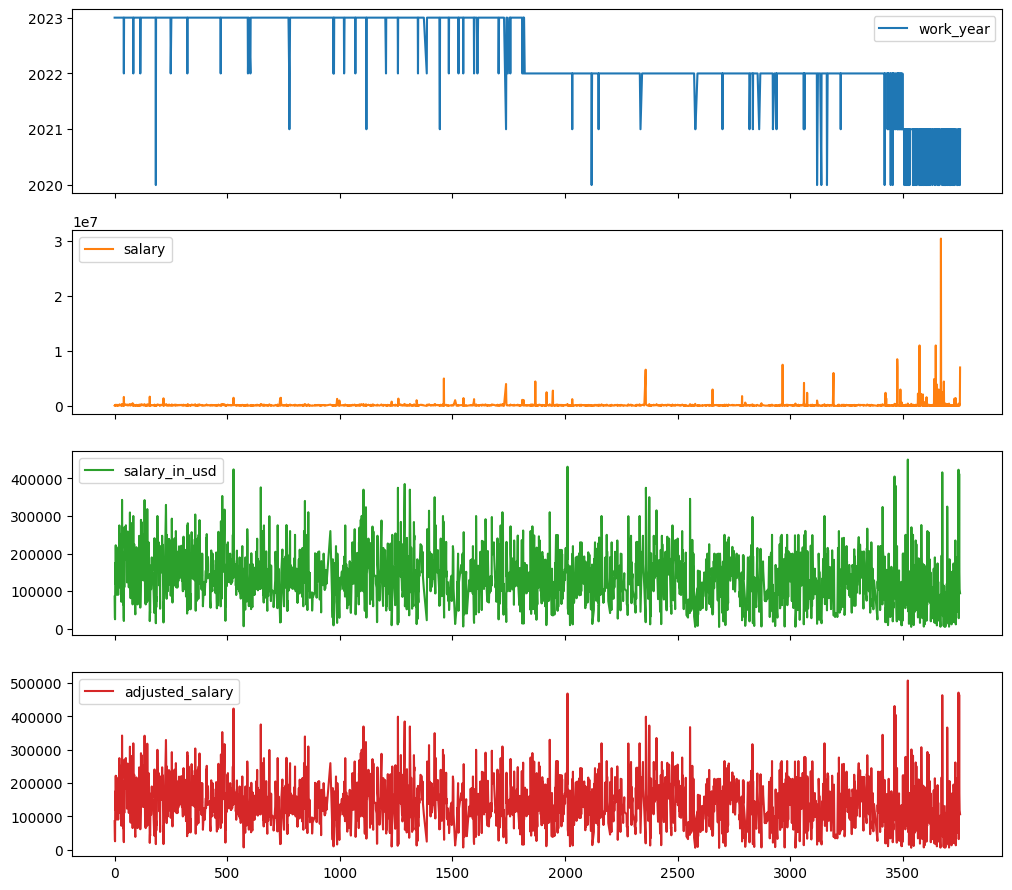

In [ ]:
data.plot(subplots=True, figsize=(12,11))

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True)*100
value_counts

Data Engineering     44.156347
Data Scientist       24.729102
Other                15.402477
Machine Learning      9.442724
Management            3.637771
Data_Architecture     2.631579
Name: job_category, dtype: float64

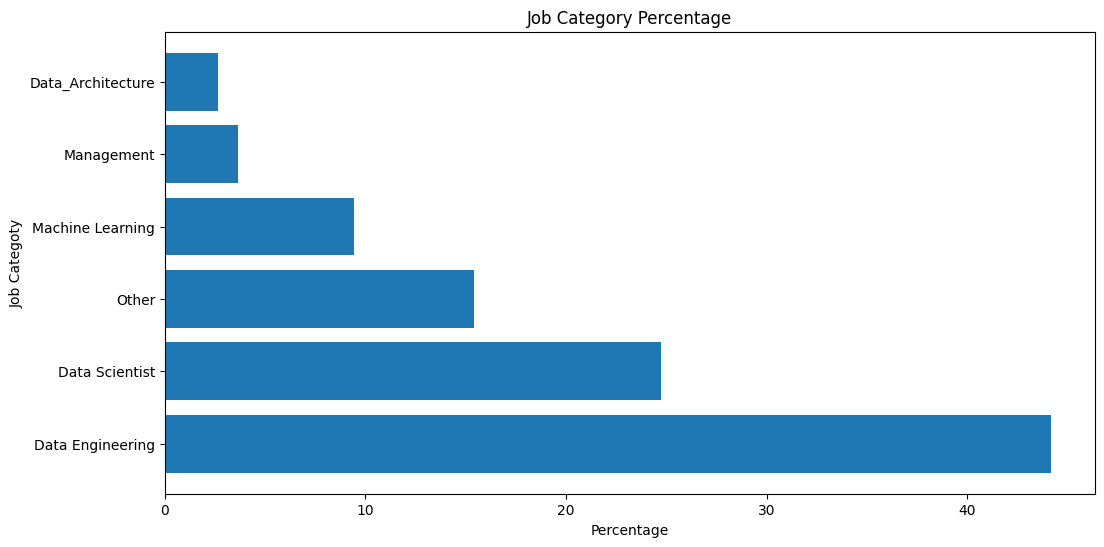

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Categoty')

plt.show()

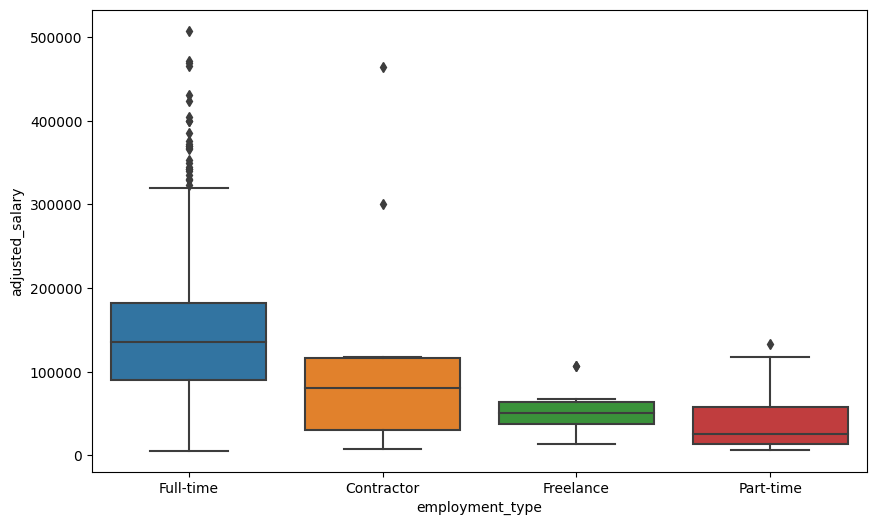

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='employment_type', y='adjusted_salary')
plt.show()

1.9 Distribution of Salary

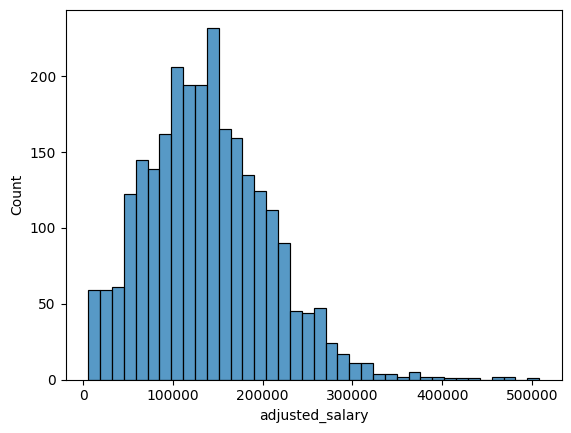

In [ ]:
sns.histplot(data['adjusted_salary'])
plt.show()

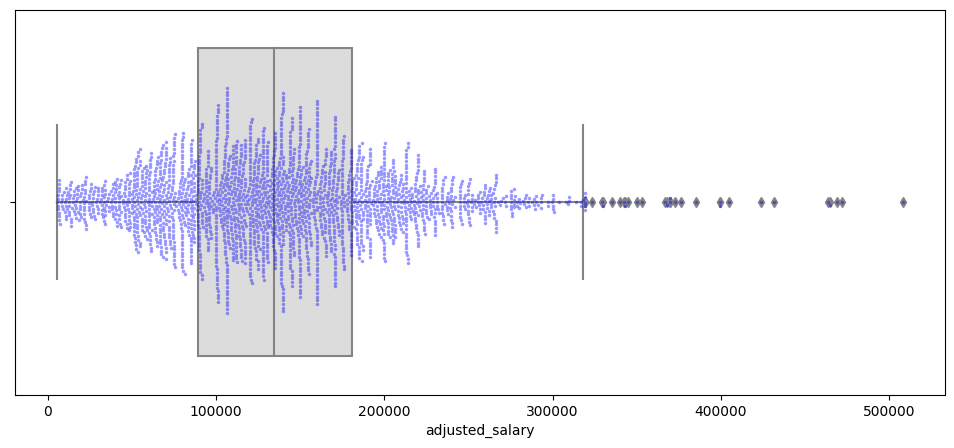

In [ ]:
plt.figure(figsize=(12,5))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color ='blue', alpha = 0.4, size= 2.5)

plt.show()

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

1. Show the median adjusted data scientist salary, for each experience level
2. Show the number of records for each company_location, sorted descending
3. From this data, show the median adjusted salary of employee who works for company located in Indonesia, do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other,85847.000000
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other,168373.305000
3752,2020,Entry Level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


In [ ]:
# 1.
data['experience_level'].value_counts(normalize=True)

Senior                    0.601393
Mid/Intermediate Level    0.256966
Entry Level               0.104489
Executive Level           0.037152
Name: experience_level, dtype: float64

In [ ]:
value_counts_experience_level = data['experience_level'].value_counts(normalize=True)*100
value_counts_experience_level

Senior                    60.139319
Mid/Intermediate Level    25.696594
Entry Level               10.448916
Executive Level            3.715170
Name: experience_level, dtype: float64

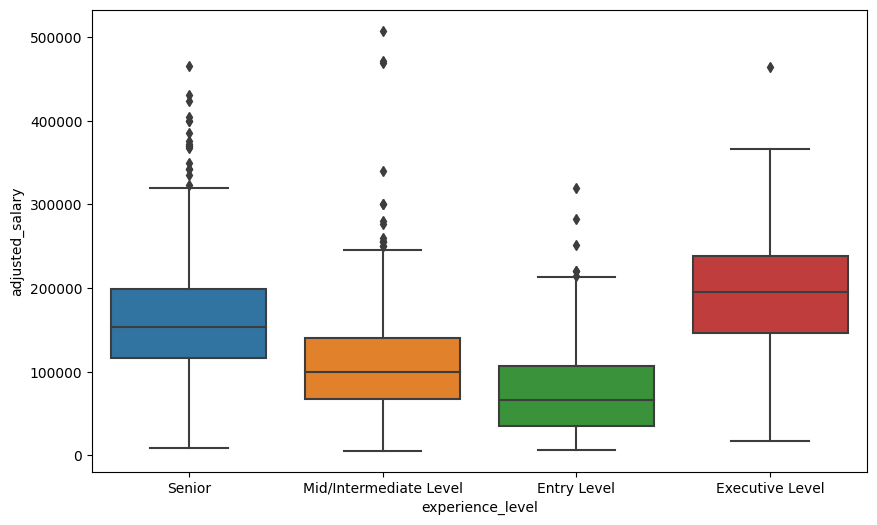

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='experience_level', y='adjusted_salary')
plt.show()

In [ ]:
total_median_by_experience = np.median(data['adjusted_salary'])
print(total_median_by_experience)

134318.173494272


In [ ]:
median_for_each_experience = data.groupby('experience_level')['adjusted_salary'].median()
median_formatted = median_for_each_experience.round(2).apply(lambda x: "{:.2f}".format(x))
print(median_formatted)

experience_level
Entry Level                66427.06
Executive Level           195150.00
Mid/Intermediate Level    100000.00
Senior                    153360.00
Name: adjusted_salary, dtype: object


In [ ]:
# 2.
value_counts_company_location = data['company_location'].value_counts()
print(value_counts_company_location.sort_values(ascending = False))
print("Total Data:",value_counts_company_location.sum())

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
NZ       1
CL       1
MD       1
EG       1
MT       1
Name: company_location, Length: 72, dtype: int64
Total Data: 2584


In [ ]:
# 3.
data_filtered = data.loc[data['company_location'] == 'ID']
print(data_filtered)

      work_year        experience_level employment_type       job_title  \
3061       2022  Mid/Intermediate Level       Full-time  Data Scientist   
3139       2022             Entry Level       Full-time    Data Analyst   

       salary salary_currency  salary_in_usd employee_residence remote_ratio  \
3061  4200000             INR          53416                 IN  Full-Remote   
3139    15000             USD          15000                 ID      On-Site   

     company_location company_size      job_category  adjusted_salary  
3061               ID            L    Data Scientist        58116.608  
3139               ID            L  Data Engineering        15975.000  


In [ ]:
adjusted_salary_filtered = data_filtered['adjusted_salary']
print(adjusted_salary_filtered.reset_index(drop=True))

0    58116.608
1    15975.000
Name: adjusted_salary, dtype: float64


In [ ]:
median3 = adjusted_salary_filtered.median()
print("$:",median3.round(2))

$: 37045.8


In [ ]:
# It shows that the median salary does not represent the annual Indonesia salary for the mentioned job role (for sure) since I believe that for data engineer or scientist, the range
# of the annual salaries are about $20.000 - $25.000 at the most.